In [86]:
# !pip install pydot
# !pip install pydotplus

In [87]:
import pydot
from PIL import Image
from IPython.display import display

class AFN:
    def __init__(self, estados, alfabeto, transiciones, estado_inicial, estados_aceptacion):
        self.estados = estados
        self.alfabeto = alfabeto
        self.transiciones = transiciones
        self.estado_inicial = estado_inicial
        self.estados_aceptacion = estados_aceptacion

In [88]:
def make_afn(expresion_regular):
    estados = set()
    alfabeto = set()
    transiciones = {}
    estado_inicial = 0
    estados_aceptacion = set()
    estado_actual = estado_inicial
    estados.add(estado_actual)

    pila = []
    for caracter in expresion_regular:
        if caracter in ('a', 'b', 'c'):
            alfabeto.add(caracter)
            estado_siguiente = estado_actual + 1
            estados.add(estado_siguiente)
            transiciones[(estado_actual, caracter)] = estado_siguiente
            estado_actual = estado_siguiente
        elif caracter == '.':
            estado_siguiente = estado_actual + 1
            estados.add(estado_siguiente)
            transiciones[(estado_actual, '')] = estado_siguiente
            estado_actual = estado_siguiente
        elif caracter == '(':
            pila.append((estado_inicial, estado_actual))
        elif caracter == ')':
            estado_anterior, estado_inicial = pila.pop()
            estados.add(estado_inicial)
            estados.add(estado_actual + 1)
            transiciones[(estado_anterior, '')] = estado_inicial
            transiciones[(estado_anterior, '')] = estado_actual + 1
            estado_actual += 1
        elif caracter == 'U':
            # Operador unión: Crear un nuevo estado inicial y conectar con ε a los estados iniciales de ambas expresiones
            nuevo_estado_inicial = estado_inicial - 1
            estados.add(nuevo_estado_inicial)
            transiciones[(nuevo_estado_inicial, 'ε')] = estado_inicial  # Transición ε al estado inicial de la primera expresión
            transiciones[(nuevo_estado_inicial, '')] = estado_actual + 1  # Transición ε al estado inicial de la segunda expresión
            estado_inicial = nuevo_estado_inicial
            estado_actual = estado_actual + 1
        elif caracter == '*':
            transiciones[(estado_actual, '')] = estado_inicial
            


    estados_aceptacion.add(estado_actual)

    return AFN(estados, alfabeto, transiciones, estado_inicial, estados_aceptacion)


In [89]:
def print_afd(afnd):
    graph = pydot.Dot(graph_type='digraph')
    for estado in afnd.estados:
        if estado == afnd.estado_inicial:
            node = pydot.Node(str(estado), shape='ellipse', style='bold', label=f'q{estado}')
        elif estado in afnd.estados_aceptacion:
            node = pydot.Node(str(estado), shape='doublecircle', label=f'q{estado}')
        else:
            node = pydot.Node(str(estado), shape='ellipse', label=f'q{estado}')
        graph.add_node(node)

    for transicion, destino in afnd.transiciones.items():
        if transicion[1] == '':
            edge = pydot.Edge(str(transicion[0]), str(destino), label='ε')
        else:
            edge = pydot.Edge(str(transicion[0]), str(destino), label=transicion[1])
        graph.add_edge(edge)

    graph.write_png('./afn.png')
    im = Image.open('./afn.png')
    display(im)

Estados: {0, 1, 2, 3, 4, 5, 6, 7, 8, -1}
Alfabeto: {'b', 'a'}
Transiciones: {(0, 'a'): 1, (1, ''): 2, (2, 'b'): 3, (0, ''): 8, (-1, 'ε'): 0, (-1, ''): 7, (5, 'a'): 6}
Estado Inicial: 0
Estados de Aceptación: {8}


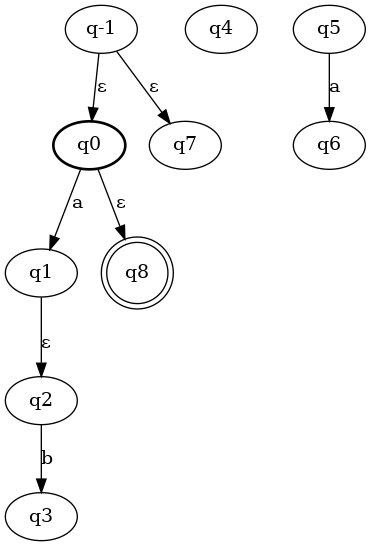

In [90]:
# Solicita la expresión regular al usuario
expresion_regular = input("Introduce la expresión regular: ")

# Construye el AFND
afn = make_afn(expresion_regular)

# Muestra la representación textual del AFND
print("Estados:", afn.estados)
print("Alfabeto:", afn.alfabeto)
print("Transiciones:", afn.transiciones)
print("Estado Inicial:", afn.estado_inicial)
print("Estados de Aceptación:", afn.estados_aceptacion)

# Dibuja el AFND y muestra la imagen
print_afd(afn)